In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import cmocean as cm

In [2]:
lonlat = pd.read_csv('SSTlonlat.txt', sep=" ")
land = pd.read_csv('SSTlandmask.txt', sep=" ")
data = pd.read_csv('SSTdata.txt', sep=" ")

In [3]:
data['landmask'] = land['mask']
data['lon'] = lonlat['lon']
data['lat'] = lonlat['lat']
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V393,V394,V395,V396,V397,V398,V399,landmask,lon,lat
0,-0.362888,-0.209061,0.532890,-0.394764,-0.283752,-0.453203,0.137655,-0.375002,-0.397110,-0.607971,...,-0.109610,-0.516720,0.569923,0.462889,0.027107,0.485939,0.146637,1,124,-29
1,-0.284611,-0.228437,0.669144,-0.346407,-0.284142,-0.420782,0.104765,-0.169689,-0.320547,-0.497110,...,-0.314299,-0.704609,0.429298,0.195234,-0.228361,0.302811,-0.277107,1,126,-29
2,-0.191954,-0.260626,0.878592,-0.234219,-0.225546,-0.315157,0.032421,0.199299,-0.221251,-0.185938,...,-0.576252,-0.844687,0.289064,-0.001875,-0.433205,0.020620,-0.717657,1,128,-29
3,-0.156799,-0.212969,0.997189,-0.136326,-0.156485,-0.247187,-0.108828,0.390469,-0.068516,0.000391,...,-0.903515,-1.037109,0.017111,-0.285549,-0.703049,-0.347971,-1.245312,1,130,-29
4,-0.123905,-0.174999,1.102346,-0.074451,-0.103750,-0.300076,-0.360466,0.479141,-0.040705,0.090313,...,-1.010706,-1.082188,-0.108667,-0.508751,-1.012657,-0.702497,-1.702654,1,132,-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,-1.043436,-1.024376,-0.875937,0.126717,-0.021952,-0.339764,-0.059063,-0.105154,0.414061,0.390236,...,0.321558,0.706486,0.366638,-0.240467,-0.743435,-0.436878,0.642815,0,282,29
2516,-1.097656,-1.023438,-0.942970,0.115705,0.000704,-0.185860,-0.109690,-0.096485,0.468590,0.351719,...,0.454842,1.036718,1.337109,0.819609,0.484846,0.236563,1.062033,0,284,29
2517,-1.031094,-1.039606,-1.017967,0.112423,0.032423,-0.235622,-0.175861,-0.142813,0.460390,0.287893,...,0.246639,0.961641,1.101015,0.460705,-0.326094,-0.747108,0.267033,0,286,29
2518,-1.057501,-1.096407,-0.992189,0.010937,-0.113749,-0.321720,-0.305542,-0.142971,0.381020,0.071638,...,0.278519,0.906637,0.809294,0.329607,-0.153751,-0.221407,0.782808,0,288,29


## Preprocessing
Delete land rows and make seperate datasets of up to April 1997 and just October 1997

In [4]:
#delete land rows
data = data[data['landmask'] != 1]

In [5]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V393,V394,V395,V396,V397,V398,V399,landmask,lon,lat
15,0.229610,0.251560,0.451094,0.298908,-0.289139,-0.202892,-0.139219,-0.331797,-0.089531,0.000624,...,1.016718,0.590622,1.071095,1.037579,0.447111,0.539061,0.581095,0,154,-29
16,0.486250,0.450783,0.533281,0.549921,-0.225939,-0.059689,0.202499,0.069689,0.155235,0.237970,...,1.192734,0.825468,1.216564,1.189688,0.136248,0.222033,0.459530,0,156,-29
17,0.785545,0.613512,0.586096,0.616095,-0.118906,-0.019611,0.359608,0.284922,0.209141,0.395939,...,1.370390,1.099686,1.274528,1.274532,0.026796,-0.073986,0.343595,0,158,-29
18,0.941172,0.760311,0.701719,0.595627,-0.025312,-0.022734,0.409689,0.379374,0.209293,0.427658,...,1.031794,0.920158,0.911793,0.986567,0.122419,-0.164688,0.254219,0,160,-29
19,1.023979,0.784063,0.753754,0.615860,0.023594,-0.065704,0.302891,0.436327,0.263594,0.372110,...,1.011091,0.910860,0.823906,0.763905,0.105228,-0.362186,0.138752,0,162,-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,-1.043436,-1.024376,-0.875937,0.126717,-0.021952,-0.339764,-0.059063,-0.105154,0.414061,0.390236,...,0.321558,0.706486,0.366638,-0.240467,-0.743435,-0.436878,0.642815,0,282,29
2516,-1.097656,-1.023438,-0.942970,0.115705,0.000704,-0.185860,-0.109690,-0.096485,0.468590,0.351719,...,0.454842,1.036718,1.337109,0.819609,0.484846,0.236563,1.062033,0,284,29
2517,-1.031094,-1.039606,-1.017967,0.112423,0.032423,-0.235622,-0.175861,-0.142813,0.460390,0.287893,...,0.246639,0.961641,1.101015,0.460705,-0.326094,-0.747108,0.267033,0,286,29
2518,-1.057501,-1.096407,-0.992189,0.010937,-0.113749,-0.321720,-0.305542,-0.142971,0.381020,0.071638,...,0.278519,0.906637,0.809294,0.329607,-0.153751,-0.221407,0.782808,0,288,29


In [6]:
sst = data[data.columns[0:328]]
octoberSST = data[data.columns[333]]

## Compute EOF (principal components)

In [7]:
sst = sst.to_numpy()

In [8]:
Z = sst.T

In [9]:
spat_mean = np.mean(Z, 0)
np.shape(spat_mean)

(2261,)

In [10]:
np.shape(Z)

(328, 2261)

In [11]:
Zspat_detrend = [Z[i,:] - spat_mean for i in range(np.shape(Z)[0])]
Zspat_detrend = np.asarray(Zspat_detrend)

In [12]:
np.shape(Zspat_detrend)

(328, 2261)

In [13]:
nt = 328 #number of observations
Zt = Zspat_detrend / math.sqrt(nt - 1)

In [14]:
U, S, Ev = np.linalg.svd(Zt)
Ev = Ev.T

#### pick 10 EOFs for this analysis

In [15]:
n = 10;
TS = np.matmul(Zspat_detrend, Ev[:, 0:n]) #can't just straight up multiply matrices in python, must use this function
# can do @ instead of matmul()

In [16]:
# lets check a day to see how good out reconstruction is!
SSTreconstructed = np.matmul(Ev[:, 0:n],TS[228, :].T) + spat_mean.T
# got to plot this to compare but not the focus rn

Text(0.5, 1.0, 'Error')

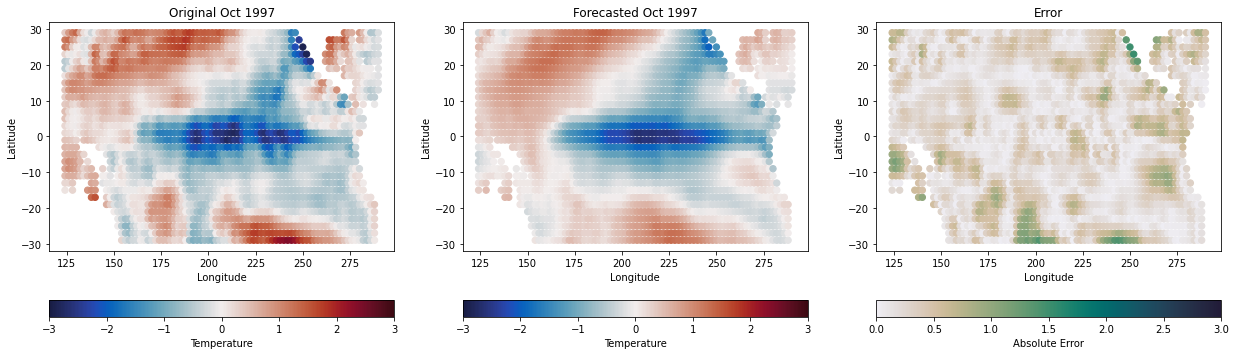

In [17]:
fig, ax = plt.subplots(1,3, figsize = (21,6))
C = ax[0].scatter(data.lon,data.lat,c=Z[228,:], cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[0], label='Temperature',orientation="horizontal")
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('Original Oct 1997')

C = ax[1].scatter(data.lon,data.lat,c=SSTreconstructed, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[1], label='Temperature',orientation="horizontal")
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_title('Forecasted Oct 1997')

C = ax[2].scatter(data.lon,data.lat,c=abs(Z[228,:]-SSTreconstructed), cmap = cm.cm.rain, s = 40, vmin=0, vmax=3)
plt.colorbar(C, ax=ax[2], label='Absolute Error',orientation="horizontal")
ax[2].set_ylabel('Latitude')
ax[2].set_xlabel('Longitude')
ax[2].set_title('Error')

## Dynamic Model

In [18]:
tau = 6;
# [nt d] = size(TS); nt still 328?
Cov0 = np.matmul(TS.T,TS) / nt 
TStplustau = TS[tau:nt, :] #TS with first tau time pts removed
TSt = TS[0:(nt-tau),:]    # TS with last tau time pts removed
Covtau = np.matmul(TSt.T, TStplustau).T / (nt - tau)

In [19]:
# In MATLAB?
C0inv = np.linalg.inv(Cov0) #<- solve(Cov0)
Mest = Covtau * C0inv
Ceta = Cov0 - Covtau * C0inv * Covtau.T

### Compute prediction 6 months ahead

In [20]:
alpha_forecast = Mest @ TS[327, :].T

In [21]:
spatial_forecast_6lag = Ev[:, 0:n]@alpha_forecast + spat_mean.T

In [22]:
C = Mest * Cov0 * Mest.T + Ceta

In [23]:
forecast_bounds = 2 * np.sqrt(np.diag(np.matmul(np.matmul(Ev[:, 0:n], C), Ev[:, 0:n].T)))

Text(0.5, 1.0, 'Error Bounds')

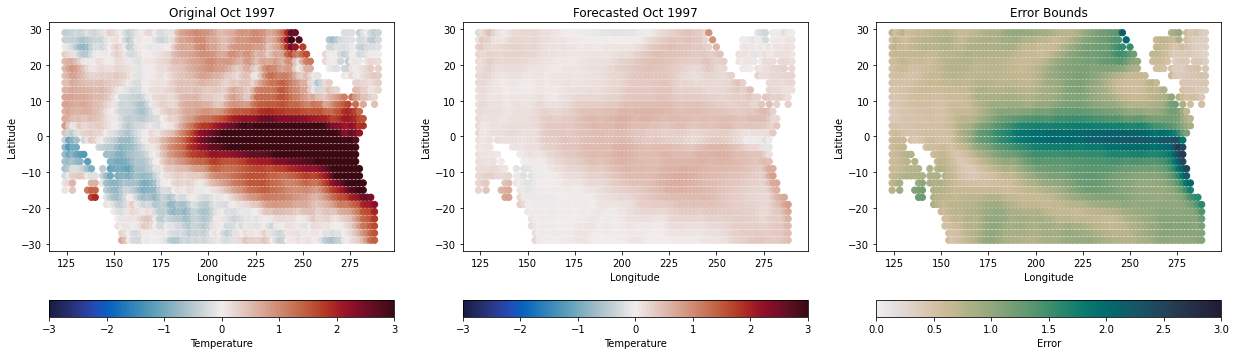

In [24]:
fig, ax = plt.subplots(1,3, figsize = (21,6))
C = ax[0].scatter(data.lon,data.lat,c=octoberSST, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[0], label='Temperature',orientation="horizontal")
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('Original Oct 1997')

C = ax[1].scatter(data.lon,data.lat,c=spatial_forecast_6lag, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[1], label='Temperature',orientation="horizontal")
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_title('Forecasted Oct 1997')

C = ax[2].scatter(data.lon,data.lat,c=forecast_bounds, cmap = cm.cm.rain, s = 40, vmin=0, vmax=3)
plt.colorbar(C, ax=ax[2], label='Error',orientation="horizontal")
ax[2].set_ylabel('Latitude')
ax[2].set_xlabel('Longitude')
ax[2].set_title('Error Bounds')

## Assignment 

1. Consider a lag-1 linear dynamic model 
and estimate the corresponding
operator (matrix) $\mathbf{M}$ 
using the same $n = 10$ EOF's we 
used in class. 
Compute predictions from Oct 1997
using data until April 1997, and the
corresponding pixel-wise standard errors. 
2. Compare, visually, your new forecast 
with the one obtained in class. What do you 
observe? Which method (if any) appears to yield
better predictions? In which sense are they 
better? 
3. Consider a higher-dimensional approximation to the
data using $n = 100$ EOF's. This will result
in better
approximations (the $\mathbf{Z}_t^{(R)}$'s 
will be closer to the $\mathbf{Z}_t$'s). 
Confirm (visually) that this is the case 
using the Jan 1989 observations. 
5. Repeat 1 and 2 above but using $n = 100$ EOFs.
6. Compare, visually, your new forecast 
with the one obtained in 2 above. Discuss.

# Question 1

In [25]:
# all the stuff from computing the EOFs should stay the same
tau = 1 # this was 6 before and now is 1 (month by month) which is why the following things will change
Cov0 = np.matmul(TS.T,TS) / nt 
TStplustau = TS[tau:nt, :] #TS with first tau time pts removed
TSt = TS[0:(nt-tau),:]    # TS with last tau time pts removed
Covtau = np.matmul(TSt.T, TStplustau).T / (nt - tau)

In [26]:
C0inv = np.linalg.inv(Cov0) #<- solve(Cov0)
Mest = Covtau * C0inv
Ceta = Cov0 - Covtau * C0inv * Covtau.T

i believe that this stuff aboev does not change with every step - just created a model  that can go month by month

In [27]:
#may
alpha_forecast = Mest @ TS[327, :].T
#june
alpha_forecast = Mest @ alpha_forecast
#july
alpha_forecast = Mest @ alpha_forecast
#august
alpha_forecast = Mest @ alpha_forecast
#september
alpha_forecast = Mest @ alpha_forecast
#october
alpha_forecast = Mest @ alpha_forecast

In [28]:
spatial_forecast_1lag = Ev[:, 0:n]@alpha_forecast + spat_mean.T

In [29]:
C = Mest * Cov0 * Mest.T + Ceta

In [30]:
forecast_bounds = 2 * np.sqrt(np.diag(np.matmul(np.matmul(Ev[:, 0:n], C), Ev[:, 0:n].T)))

Text(0.5, 1.0, 'Error Bounds')

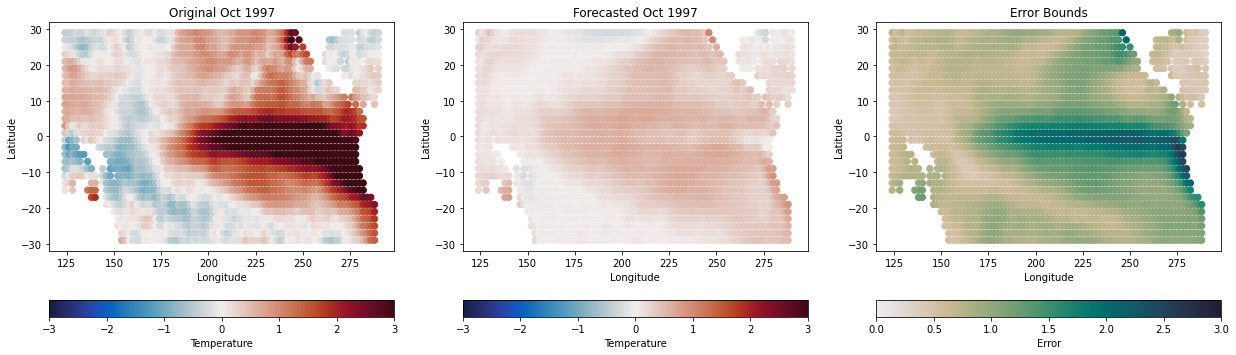

In [31]:
fig, ax = plt.subplots(1,3, figsize = (21,6))
C = ax[0].scatter(data.lon,data.lat,c=octoberSST, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[0], label='Temperature',orientation="horizontal")
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('Original Oct 1997')

C = ax[1].scatter(data.lon,data.lat,c=spatial_forecast_1lag, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[1], label='Temperature',orientation="horizontal")
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_title('Forecasted Oct 1997')

C = ax[2].scatter(data.lon,data.lat,c=forecast_bounds, cmap = cm.cm.rain, s = 40, vmin=0, vmax=3)
plt.colorbar(C, ax=ax[2], label='Error',orientation="horizontal")
ax[2].set_ylabel('Latitude')
ax[2].set_xlabel('Longitude')
ax[2].set_title('Error Bounds')

# Question 2

Text(0.5, 1.0, '6 Month Lag - 1 Month Lag')

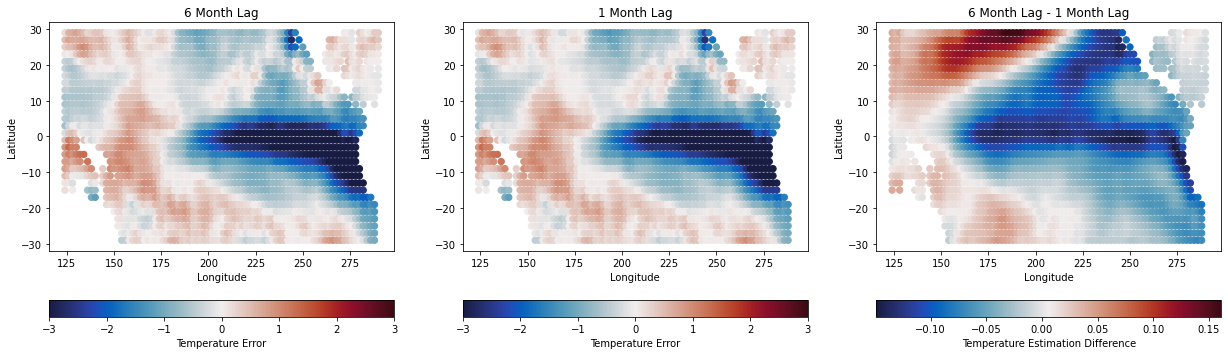

In [32]:
fig, ax = plt.subplots(1,3, figsize = (21,6))

C = ax[0].scatter(data.lon,data.lat,c=spatial_forecast_6lag-octoberSST, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[0], label='Temperature Error',orientation="horizontal")
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('6 Month Lag')

C = ax[1].scatter(data.lon,data.lat,c=spatial_forecast_1lag-octoberSST, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[1], label='Temperature Error',orientation="horizontal")
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_title('1 Month Lag')

C = ax[2].scatter(data.lon,data.lat,c=spatial_forecast_6lag-spatial_forecast_1lag, cmap = cm.cm.balance, s = 40)
plt.colorbar(C, ax=ax[2], label='Temperature Estimation Difference',orientation="horizontal")
ax[2].set_ylabel('Latitude')
ax[2].set_xlabel('Longitude')
ax[2].set_title('6 Month Lag - 1 Month Lag')

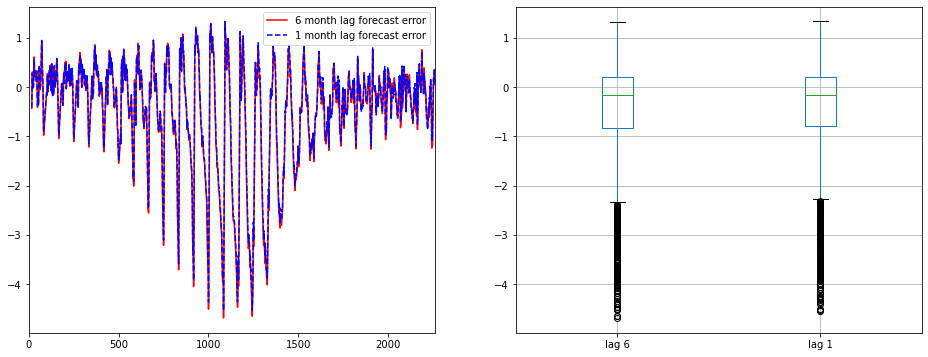

In [33]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
ax[0].plot(spatial_forecast_6lag-octoberSST, 'r', label = "6 month lag forecast error")
ax[0].plot(spatial_forecast_1lag-octoberSST, 'b--', label = "1 month lag forecast error")
ax[0].set_xlim([0,2261])
ax[0].legend()

d = {'lag 6':spatial_forecast_6lag-octoberSST, 'lag 1':spatial_forecast_1lag-octoberSST}
df = pd.DataFrame(d)
boxplot = df.boxplot(column=['lag 6', 'lag 1'], ax=ax[1])  

In [34]:
r6 = np.corrcoef(octoberSST,spatial_forecast_6lag)[0,1]
r1 = np.corrcoef(octoberSST,spatial_forecast_1lag)[0,1]
print('correlation of lag 6 model = '+str(round(r6,3)))
print('correlation of lag 1 model = '+str(round(r1,3)))

correlation of lag 6 model = 0.579
correlation of lag 1 model = 0.621


### What do you observe? Which method (if any) appears to yield better predictions? In which sense are they better?
Just comparing the two spatial plots it is difficult to tell which method yield better predictions. However, when taking the difference betwee the two estimations it can be observed that the 1 month lag model has a slightly lower error in the region of the large temperature signal on October of 1997. So in terms of predicting anomalous behaviour the 1 month temperature signal is slightly better. <br>
If we look at other measures of accuracy it is again difficult to see the difference. Visually the box plot look almost identical. The lag 1 model predicts slightly better with a mean error values closer to 0, smaller standard deviations from this mean, and maximum errors not reaching quite as low as the lag 6 model. The correlation of the lag 1 model is also slightly better, 0.621 instead of 0.579, but it should be noted that the correlation is not the problem in these predictions, it is the magnitude. 

# Question 3

In [35]:
n = 100
TS = Zspat_detrend @ Ev[:, 0:n]

In [36]:
SSTreconstructed100 = np.matmul(Ev[:, 0:n],TS[228, :].T) + spat_mean.T

Text(0.5, 1.0, 'Error')

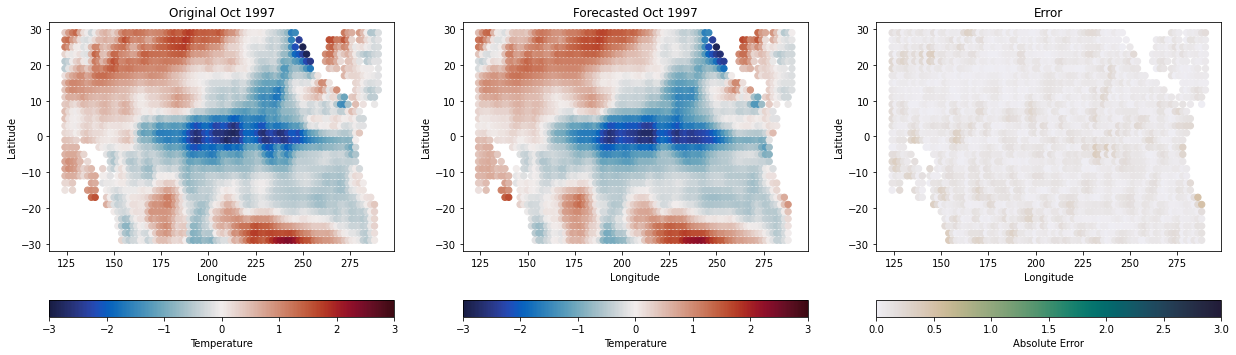

In [37]:
fig, ax = plt.subplots(1,3, figsize = (21,6))
C = ax[0].scatter(data.lon,data.lat,c=Z[228,:], cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[0], label='Temperature',orientation="horizontal")
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('Original Oct 1997')

C = ax[1].scatter(data.lon,data.lat,c=SSTreconstructed100, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[1], label='Temperature',orientation="horizontal")
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_title('Forecasted Oct 1997')

C = ax[2].scatter(data.lon,data.lat,c=abs(Z[228,:]-SSTreconstructed100), cmap = cm.cm.rain, s = 40, vmin=0, vmax=3)
plt.colorbar(C, ax=ax[2], label='Absolute Error',orientation="horizontal")
ax[2].set_ylabel('Latitude')
ax[2].set_xlabel('Longitude')
ax[2].set_title('Error')

# Question 4
### first 6 month lag

In [38]:
tau = 6;
Cov0 = np.matmul(TS.T,TS) / nt 
TStplustau = TS[tau:nt, :] #TS with first tau time pts removed
TSt = TS[0:(nt-tau),:]    # TS with last tau time pts removed
Covtau = np.matmul(TSt.T, TStplustau).T / (nt - tau)

C0inv = np.linalg.inv(Cov0) #<- solve(Cov0)
Mest = Covtau * C0inv
Ceta = Cov0 - Covtau * C0inv * Covtau.T

In [39]:
alpha_forecast = Mest @ TS[327, :].T
spatial_forecast_6lag100 = Ev[:, 0:n]@alpha_forecast + spat_mean.T
C = Mest * Cov0 * Mest.T + Ceta
forecast_bounds = 2 * np.sqrt(np.diag(np.matmul(np.matmul(Ev[:, 0:n], C), Ev[:, 0:n].T)))

Text(0.5, 1.0, 'Error Bounds')

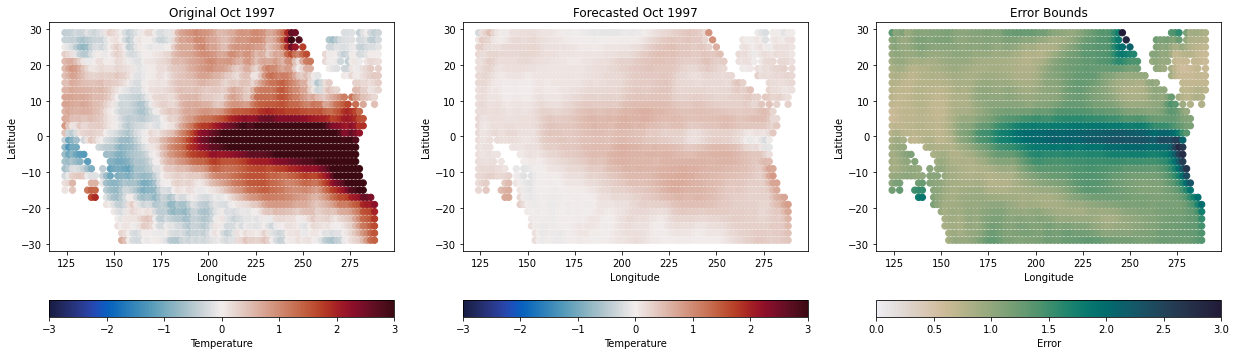

In [40]:
fig, ax = plt.subplots(1,3, figsize = (21,6))
C = ax[0].scatter(data.lon,data.lat,c=octoberSST, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[0], label='Temperature',orientation="horizontal")
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('Original Oct 1997')

C = ax[1].scatter(data.lon,data.lat,c=spatial_forecast_6lag100, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[1], label='Temperature',orientation="horizontal")
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_title('Forecasted Oct 1997')

C = ax[2].scatter(data.lon,data.lat,c=forecast_bounds, cmap = cm.cm.rain, s = 40, vmin=0, vmax=3)
plt.colorbar(C, ax=ax[2], label='Error',orientation="horizontal")
ax[2].set_ylabel('Latitude')
ax[2].set_xlabel('Longitude')
ax[2].set_title('Error Bounds')

### now lag 1

In [41]:
tau = 1
Cov0 = np.matmul(TS.T,TS) / nt 
TStplustau = TS[tau:nt, :] #TS with first tau time pts removed
TSt = TS[0:(nt-tau),:]    # TS with last tau time pts removed
Covtau = np.matmul(TSt.T, TStplustau).T / (nt - tau)

C0inv = np.linalg.inv(Cov0) #<- solve(Cov0)
Mest = Covtau * C0inv
Ceta = Cov0 - Covtau * C0inv * Covtau.T

In [42]:
#may
alpha_forecast = Mest @ TS[327, :].T
#june
alpha_forecast = Mest @ alpha_forecast
#july
alpha_forecast = Mest @ alpha_forecast
#august
alpha_forecast = Mest @ alpha_forecast
#september
alpha_forecast = Mest @ alpha_forecast
#october
alpha_forecast = Mest @ alpha_forecast

In [43]:
spatial_forecast_1lag100 = Ev[:, 0:n]@alpha_forecast + spat_mean.T
C = Mest * Cov0 * Mest.T + Ceta
forecast_bounds = 2 * np.sqrt(np.diag(np.matmul(np.matmul(Ev[:, 0:n], C), Ev[:, 0:n].T)))

Text(0.5, 1.0, 'Error Bounds')

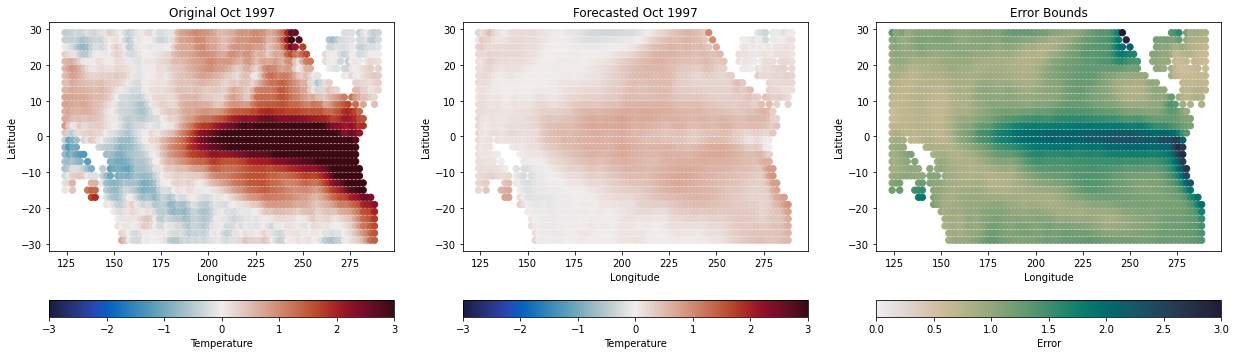

In [44]:
fig, ax = plt.subplots(1,3, figsize = (21,6))
C = ax[0].scatter(data.lon,data.lat,c=octoberSST, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[0], label='Temperature',orientation="horizontal")
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('Original Oct 1997')

C = ax[1].scatter(data.lon,data.lat,c=spatial_forecast_1lag100, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[1], label='Temperature',orientation="horizontal")
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_title('Forecasted Oct 1997')

C = ax[2].scatter(data.lon,data.lat,c=forecast_bounds, cmap = cm.cm.rain, s = 40, vmin=0, vmax=3)
plt.colorbar(C, ax=ax[2], label='Error',orientation="horizontal")
ax[2].set_ylabel('Latitude')
ax[2].set_xlabel('Longitude')
ax[2].set_title('Error Bounds')

### compare them visually

Text(0.5, 1.0, '6 Month Lag - 1 Month Lag')

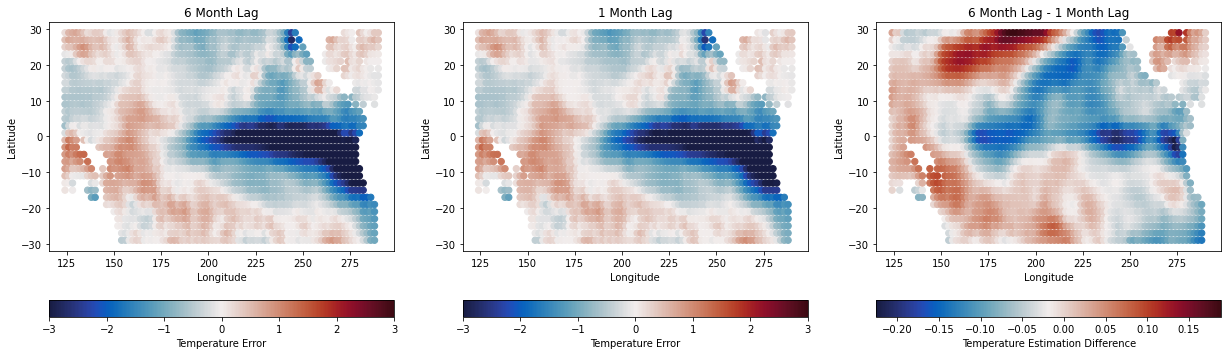

In [45]:
fig, ax = plt.subplots(1,3, figsize = (21,6))

C = ax[0].scatter(data.lon,data.lat,c=spatial_forecast_6lag100-octoberSST, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[0], label='Temperature Error',orientation="horizontal")
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('6 Month Lag')

C = ax[1].scatter(data.lon,data.lat,c=spatial_forecast_1lag100-octoberSST, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[1], label='Temperature Error',orientation="horizontal")
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_title('1 Month Lag')

C = ax[2].scatter(data.lon,data.lat,c=spatial_forecast_6lag100-spatial_forecast_1lag100, cmap = cm.cm.balance, s = 40)
plt.colorbar(C, ax=ax[2], label='Temperature Estimation Difference',orientation="horizontal")
ax[2].set_ylabel('Latitude')
ax[2].set_xlabel('Longitude')
ax[2].set_title('6 Month Lag - 1 Month Lag')

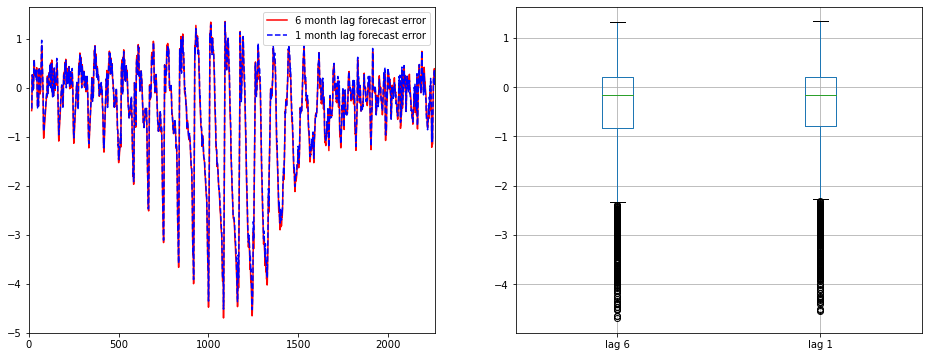

In [46]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
ax[0].plot(spatial_forecast_6lag100-octoberSST, 'r', label = "6 month lag forecast error")
ax[0].plot(spatial_forecast_1lag100-octoberSST, 'b--', label = "1 month lag forecast error")
ax[0].set_xlim([0,2261])
ax[0].legend()

d = {'lag 6':spatial_forecast_6lag-octoberSST, 'lag 1':spatial_forecast_1lag-octoberSST}
df = pd.DataFrame(d)
boxplot = df.boxplot(column=['lag 6', 'lag 1'], ax=ax[1])  

In [47]:
r6 = np.corrcoef(octoberSST,spatial_forecast_6lag100)[0,1]
r1 = np.corrcoef(octoberSST,spatial_forecast_1lag100)[0,1]
print('correlation of lag 6 model = '+str(round(r6,3)))
print('correlation of lag 1 model = '+str(round(r1,3)))

correlation of lag 6 model = 0.574
correlation of lag 1 model = 0.617


### What do you observe? Which method (if any) appears to yield better predictions? In which sense are they better?

Although the overall estimation in these predictions does seem to improve as expected by increasing the numer of EOFs, the difference between the 6 month and 1 month lag models are hard to discern due to the large magnitude errors in both. Again, just comparing the two spatial plots it is difficult to tell which method yield better predictions. However, when taking the difference betwee the two estimations it can be observed that the 1 month lag model has a slightly lower error in the region of the large temperature signal on October of 1997 and slightly lower error in the area of low temperature offshore. So again in temr of predicting the spatial differences the anomalous behaviour of this date the lag 1 model is better. <br>

I again tried looking at the two predictions using box plots and by calculating their correlatino to the October 1997 data. Visually the box plots are hard to tell appart. The lag 1 model predicts slightly better with a mean error values closer to 0, smaller standard deviations from this mean, and maximum errors not reaching quite as low as the lag 6 model. The correlation of the lag 1 model is again slightly better, 0.617 instead of 0.574, but notably has decreased in correlation from the n=10 EOF prediction. 

# Question 5

Text(0.5, 1.0, 'n=10 - n=100')

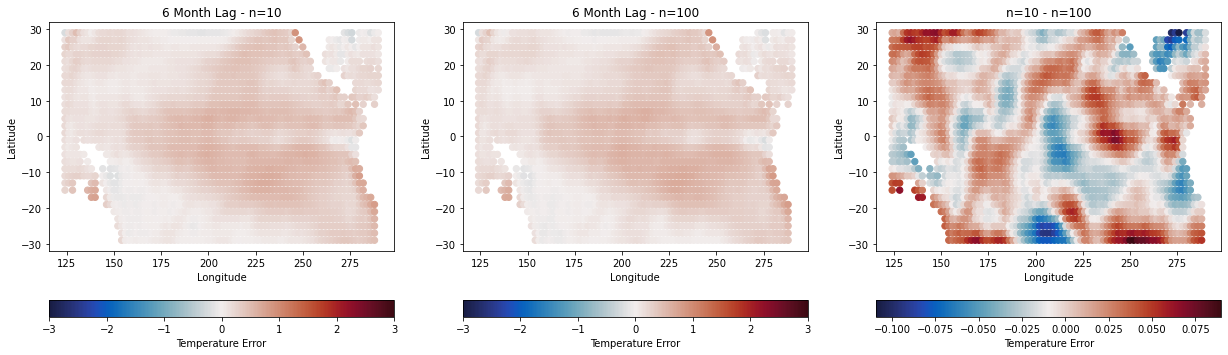

In [48]:
fig, ax = plt.subplots(1,3, figsize = (21,6))

C = ax[0].scatter(data.lon,data.lat,c=spatial_forecast_6lag, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[0], label='Temperature Error',orientation="horizontal")
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('6 Month Lag - n=10')

C = ax[1].scatter(data.lon,data.lat,c=spatial_forecast_6lag100, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[1], label='Temperature Error',orientation="horizontal")
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_title('6 Month Lag - n=100')

C = ax[2].scatter(data.lon,data.lat,c=spatial_forecast_6lag - spatial_forecast_6lag100, cmap = cm.cm.balance, s = 40)
plt.colorbar(C, ax=ax[2], label='Temperature Error',orientation="horizontal")
ax[2].set_ylabel('Latitude')
ax[2].set_xlabel('Longitude')
ax[2].set_title('n=10 - n=100')

Text(0.5, 1.0, 'n=10 - n=100')

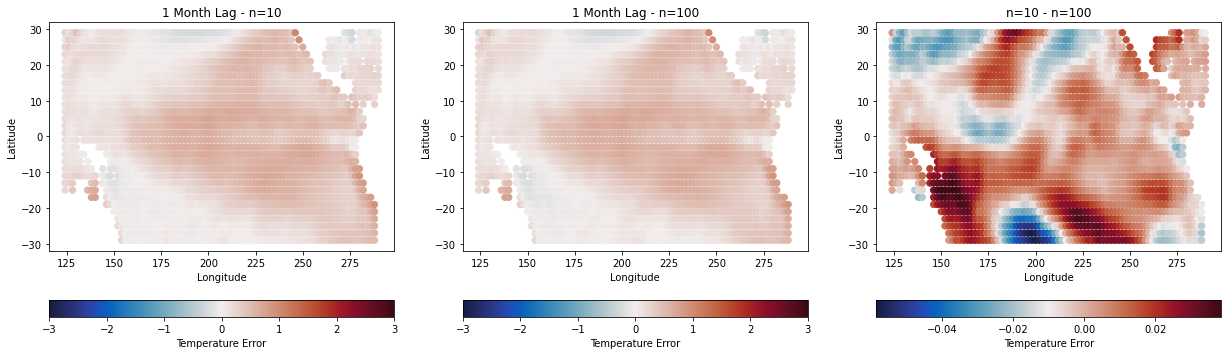

In [49]:
fig, ax = plt.subplots(1,3, figsize = (21,6))

C = ax[0].scatter(data.lon,data.lat,c=spatial_forecast_1lag, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[0], label='Temperature Error',orientation="horizontal")
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('1 Month Lag - n=10')

C = ax[1].scatter(data.lon,data.lat,c=spatial_forecast_1lag100, cmap = cm.cm.balance, s = 40, vmin=-3, vmax=3)
plt.colorbar(C, ax=ax[1], label='Temperature Error',orientation="horizontal")
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_title('1 Month Lag - n=100')

C = ax[2].scatter(data.lon,data.lat,c=spatial_forecast_1lag - spatial_forecast_1lag100, cmap = cm.cm.balance, s = 40)
plt.colorbar(C, ax=ax[2], label='Temperature Error',orientation="horizontal")
ax[2].set_ylabel('Latitude')
ax[2].set_xlabel('Longitude')
ax[2].set_title('n=10 - n=100')

It is difficult to say whether increasing from n=10 to n=100 EOFs actaully helped the October 1997 prediction. While the spatial variability in the reconstructed and predicted surface temperatures is better represents the spatial variability in the region, the actual error of the prediciton worsenned. This may be because of the anomolous nature of October 1997 - having too many EOFs in the prediction may cause "voer-prediction" to occur leading to a less accurate result even when more varibility is explained. Overall neither predicitions do very well as the variable behaviour od surface water temperatures make it extremely difficul to forecast far into the future with a simple model. 